## Introdução

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [2]:
'''import libraries'''
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [3]:
'''Load CSVs'''
energia_2021 = pd.read_csv('./competition/energia_202109-202112.csv',encoding='utf-8')
energia_2022 = pd.read_csv('./competition/energia_202201-202212.csv')
meteo_2021 = pd.read_csv('./competition/meteo_202109-202112.csv')
meteo_2022 = pd.read_csv('./competition/meteo_202201-202212.csv')
teste_meteo_2023 = pd.read_csv('./competition/meteo_202301-202304.csv')
teste_energia_2023 = pd.read_csv('./competition/energia_202301-202304.csv')


## Análise dos Dados

### Datasets Energia

In [4]:
energia_2021.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,NaN
1,2021-09-29,1,0.0,0.0,0.0,NaN
2,2021-09-29,2,0.0,0.0,0.0,NaN
3,2021-09-29,3,0.0,0.0,0.0,NaN
4,2021-09-29,4,0.0,0.0,0.0,NaN


In [5]:
energia_2022.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2022-01-01,0,0.0,0.486,0.0,NaN
1,2022-01-01,1,0.0,0.429,0.0,NaN
2,2022-01-01,2,0.0,0.463,0.0,NaN
3,2022-01-01,3,0.0,0.545,0.0,NaN
4,2022-01-01,4,0.0,0.439,0.0,NaN


In [6]:
energia_2021.info()
print("\n")
energia_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injeção na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null   float64
 3   Horário Económi

In [9]:
'''
Verificar a quantidade de Missing Values em cada dataset
'''

print(energia_2021.isna().sum()) # 1690 em 2256 na feature target
print("\n")
print(energia_2022.isna().sum()) # 6087 em 8769 na feature target


Data                          0
Hora                          0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)      1690
dtype: int64


Data                          0
Hora                          0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)      6087
dtype: int64


In [8]:
'''
Verificar a quantidade de valores únicos em cada feature de cada dataset
'''
energia_2021.nunique()
print("\n")
energia_2022.nunique()

#for field in energia_2021:
#    print(f"{field}: {energia_2021[field].duplicated().sum()}")

#print("\n")

#for field in energia_2022:
#    print(f"{field}: {energia_2022[field].duplicated().sum()}")

Data                        365
Hora                         24
Normal (kWh)               1132
Horário Económico (kWh)     789
Autoconsumo (kWh)           712
Injeção na rede (kWh)         4
dtype: int64

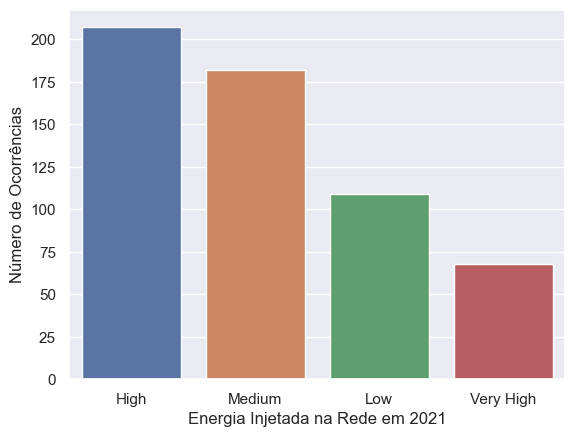

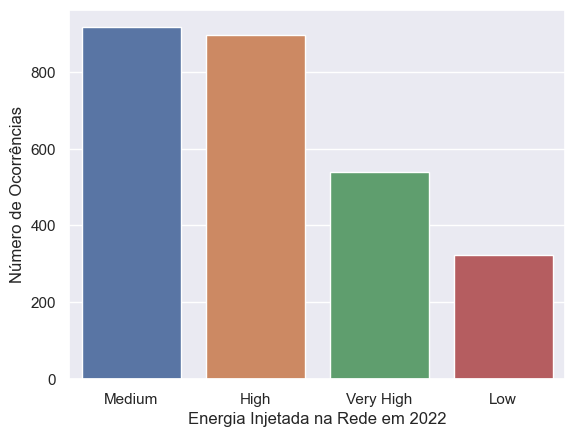

In [14]:
'''
Analisar a feature "Injeção na Rede"
'''

#2021
energia_2021_count = energia_2021["Injeção na rede (kWh)"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=energia_2021_count.index, y=energia_2021_count.values)
plt.title('')
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xlabel('Energia Injetada na Rede em 2021', fontsize=12)
plt.show()

# 2022
energia_2022_count = energia_2022["Injeção na rede (kWh)"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=energia_2022_count.index, y=energia_2022_count.values)
plt.title('')
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xlabel('Energia Injetada na Rede em 2022', fontsize=12)
plt.show()

### Datasets Meteorologia

## Tratamento dos Dados

### Simplificação dos nomes das features

### Remoção de datas

### Converter o tipo de dados da feature "Injeção na rede (kWh)" para inteiro (pelo menos para os datasets da energia)

### Tratamento de Outliers

### Tratamento de Missing Values